<a href="https://colab.research.google.com/github/jalvarezz13/machine_learning_esi_2122/blob/master/Task1%20-%20Unsupervised%20Learning/notebooks/task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Task 1] - Unsupervised Learning

Machine Learning Techniques - Escuela Superior de informática.

## Development team
<hr/>

* <img src="https://media.discordapp.net/attachments/487685117414735872/897503707921543228/JZ.png" width="60" height="60" align="center"/> Josue Carlos Zenteno Yave :: JosueCarlos.Zenteno@alu.uclm.es

* <img src="https://media.discordapp.net/attachments/487685117414735872/897503704100536350/SS.png" width="60" height="60" align="center"/> Sergio Silvestre Pavón :: Sergio.Silvestre@alu.uclm.es

* <img src="https://media.discordapp.net/attachments/487685117414735872/897503706185085008/JA.png" width="60" height="60" align="center"/> Javier Álvarez Páramo :: Javier.Alvarez13@alu.uclm.es

* <img src="https://media.discordapp.net/attachments/487685117414735872/897503709871878234/SM.png" width="60" height="60" align="center"/> Sergio Martín-Delgado Gutiérrez :: Sergio.Martinlgado@alu.uclm.es

## 1.Preprocessing
<hr/>


Upload the data from github

In [ ]:
!wget https://raw.githubusercontent.com/jalvarezz13/machine_learning_esi_2122/master/Task1%20-%20Unsupervised%20Learning/data/winequality-white.csv

--2021-10-31 12:47:47--  https://raw.githubusercontent.com/jalvarezz13/machine_learning_esi_2122/master/resources/winequality-white.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 264426 (258K) [text/plain]
Saving to: ‘winequality-white.csv.3’

winequality-white.c 100%[===================>] 258.23K  --.-KB/s    in 0.03s   

2021-10-31 12:47:47 (8.05 MB/s) - ‘winequality-white.csv.3’ saved [264426/264426]



### 1.1 Load the data 

First things first, if we do not have data to process we are doing nothing so, we are going to upload the corresponding data, in this case, we will use the collected data about wines in the ***winequality-white.csv*** file.

In [ ]:
import pandas as pd

df_white_pre = pd.read_csv("winequality-white.csv", sep =";")
df_white_pre

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


### 1.2 Transform data into a pandas dataframe

Once we have uploaded tha data, we are going to load it into a structure that allows us to handle it easily which in this case is a ***Pandas dataframe***.

In [ ]:
df_white_pre.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


### 1.3 Remove descriptive data from the dataframe

One we have uploaded all the data into a Pandas dataframe, we are going to remove all the explicative or descriptive data. In this case we remove the quality feature of the dataframe as that values are not relevant  talking about calculations (but they will be taken into account later in the conclusion part).

In [ ]:
exclude = ['quality']
df_white_post = df_white_pre.loc[:, df_white_pre.columns.difference(exclude)]
df_white_post

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,residual sugar,sulphates,total sulfur dioxide,volatile acidity
0,8.8,0.045,0.36,1.00100,7.0,45.0,3.00,20.7,0.45,170.0,0.27
1,9.5,0.049,0.34,0.99400,6.3,14.0,3.30,1.6,0.49,132.0,0.30
2,10.1,0.050,0.40,0.99510,8.1,30.0,3.26,6.9,0.44,97.0,0.28
3,9.9,0.058,0.32,0.99560,7.2,47.0,3.19,8.5,0.40,186.0,0.23
4,9.9,0.058,0.32,0.99560,7.2,47.0,3.19,8.5,0.40,186.0,0.23
...,...,...,...,...,...,...,...,...,...,...,...
4893,11.2,0.039,0.29,0.99114,6.2,24.0,3.27,1.6,0.50,92.0,0.21
4894,9.6,0.047,0.36,0.99490,6.6,57.0,3.15,8.0,0.46,168.0,0.32
4895,9.4,0.041,0.19,0.99254,6.5,30.0,2.99,1.2,0.46,111.0,0.24
4896,12.8,0.022,0.30,0.98869,5.5,20.0,3.34,1.1,0.38,110.0,0.29


### 1.4 Normalize the data

We need to transform the data to the same scale. We will choose to use ***MinMaxScaler***, which aims to transform to a scale with minimum = 0 and maximum = 1. This may generate some distortion in the data but it may be desirable to get better clustering results.

We also have taken into account that using the MinMaxScaler we obtain better results than using other scalers such as ***StandardScaler***.

In [ ]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
df_white_norm = scaler.fit_transform(df_white_post)
df_white_norm

array([[0.12903226, 0.10682493, 0.21686747, ..., 0.26744186, 0.37354988,
        0.18627451],
       [0.24193548, 0.11869436, 0.20481928, ..., 0.31395349, 0.28538283,
        0.21568627],
       [0.33870968, 0.12166172, 0.24096386, ..., 0.25581395, 0.20417633,
        0.19607843],
       ...,
       [0.22580645, 0.09495549, 0.11445783, ..., 0.27906977, 0.23665893,
        0.15686275],
       [0.77419355, 0.03857567, 0.18072289, ..., 0.18604651, 0.23433875,
        0.20588235],
       [0.61290323, 0.03264095, 0.22891566, ..., 0.11627907, 0.20649652,
        0.12745098]])

## 2.Dimensionality Reduction
<hr/>

Once we have all the data pre-processed we are ready to use PCA on it.

The Principal Component Analysis (PCA) procedure is a dimension reduction technique that projects the data on k dimensions by maximizing the variance of the data.

### 2.1 Execute PCA with all the components

Now we compute every eigen vector which is symmetric with real eigenvalues. 

Also compute the k orthogonal principal eigenvectors and finally we project the data in the k dimensional space in order to maximize the variance among all k-dimensional spaces

In [ ]:
from sklearn.decomposition import PCA

pca = PCA ()
X_pca = pca.fit_transform(df_white_norm)
X_pca.shape

(4898, 11)

### 2.2 Calculation of the percentage of variance

Then, we show the percentage of variance explained by each of the selected components.

In [ ]:
print(pca.explained_variance_ratio_.cumsum())

[0.38165992 0.56012304 0.68907551 0.77500359 0.84343162 0.88939056
 0.92863235 0.96184645 0.98617171 0.99925726 1.        ]


And finally we print the corresponding chart that shows the percentage of variance too but, in an easier way to interpret it.

In [ ]:
import plotly.express as px
import numpy as np

exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)

### 2.3 Selection of the number of components

Now we want to remark why we chosed to use the MinMaxScaler and it's due to the results obtained at this point. In other words, we obtain more or less the same variability percentage but using less components.

A example of these results is the follwing one:

| Component | 6 | 7 | 8 |
| :--: | :--: | :--: | :--: |
| StandardScaler | 0.8136 | 0.8796 | 0.9341 |
| MinMaxScaler | 0.8893 | 0.9286 | 0.9618 |

### 2.4 Recalculating PCA without all the components

Once we have decided that the number of necessary components are 6, we can recalculate the PCA wih these components.

In [ ]:
#@title Number of components {run: "auto"}
n_components = 6 #@param { type: "slider", min: 1, max: 11, step: 1}

In [ ]:
X_pca = PCA (n_components = n_components ).fit_transform(df_white_post)
X_pca

array([[ 3.37327539e+01,  1.23828497e+00,  1.27752918e+01,
        -2.34922459e-01, -8.82446345e-02, -1.00475770e-01],
       [-1.19257997e+01, -1.89575189e+01, -3.85783398e+00,
        -1.24998841e+00, -8.58998947e-01,  3.16391378e-02],
       [-4.12246715e+01,  5.73987365e+00,  2.46603160e+00,
        -9.53470954e-01,  1.19239061e+00,  1.71029754e-01],
       ...,
       [-2.79942228e+01,  1.98656157e+00, -3.76679051e+00,
        -1.74216645e+00, -4.96306443e-01, -2.22925208e-01],
       [-3.16256228e+01, -7.36798453e+00, -3.85584946e+00,
         1.80558587e+00, -1.07208604e+00, -2.74500049e-02],
       [-4.26690900e+01, -2.30113142e+00, -3.60383843e+00,
         5.78167125e-01, -6.82030285e-01, -6.61881225e-02]])

## 3.Anomaly or Outlier Detection
<hr/>

Once we have reduced the dimensionality of our problem we decided to use DBSCAN algorithm as it is an algorithm that was defined based on density describing the concepts of central point, edge and noise. Therefore it is easier to detect outliers.

### 3.1 Computing the similarity distance matrix

We calculate the shortest distance to the neighbor to obtain the epsilon to use in DBSCAN. 

As MintPts we put 9 as it is the result of calculating the neperian logarithm of the total number of wines (elements: 4898).

We want to remark that we are not drawing the similarity/distance matrix due to the large number of elements in this dataset.

In [ ]:
import sklearn.neighbors

dist = sklearn.neighbors.DistanceMetric.get_metric('euclidean')
matsim = dist.pairwise(df_white_norm)

### 3.2 Computing the distance from each point ot its neighbors

Now we compute the distance from each point to its neighbors

In [ ]:
from sklearn.neighbors import kneighbors_graph
import numpy

minPts=9

A = kneighbors_graph(df_white_norm, minPts, include_self=False)
Ar = A.toarray()

seq = []
for i,s in enumerate(df_white_norm):
    for j in range(len(df_white_norm)):
        if Ar[i][j] != 0:
            seq.append(matsim[i][j])
            
seq.sort()

Finally we draw the "Elbow diagram"

In [ ]:
fig = px.line(x=numpy.arange(0, len(seq), 1), y=seq)
fig.show()

### 3.3 Executing DBSCAN in an interval

Although it could be tested with other options we are going to choose to try different clusters from 0.25 to 0.55 with intervals of 0.05.

We also tried to do this with other intervals but we decided that this was the best one.

In [ ]:
from sklearn.cluster import DBSCAN

results = []
for eps in numpy.arange(0.25, 0.55, 0.05):
  db = DBSCAN(eps, min_samples=minPts).fit(df_white_norm)
  core_samples_mask = numpy.zeros_like(db.labels_, dtype=bool)
  core_samples_mask[db.core_sample_indices_] = True
  labels = db.labels_
  n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  n_outliers = list(labels).count(-1)
  results.append([eps, n_clusters_, n_outliers])

Finally we print the results

In [ ]:
from tabulate import tabulate

print(tabulate(results, headers = ("eps", "clusters", "outliers")))

  eps    clusters    outliers
-----  ----------  ----------
 0.25           1          76
 0.3            1          32
 0.35           1          12
 0.4            1           8
 0.45           1           5
 0.5            1           4
 0.55           1           3


### 3.4 Executing DBSCAN with a concrete epsilon

As we can see DBSCAN groups the elements in a group and the rest are outliers. The number of outliers is significant to take into account, so we are going to keep the settings that offer a balanced number between outliers and groups.

Now we want to remark why we chosed to use the previously mentioned interval because we obtain a "good" clusters/outliers ratio. Specifically with an epsilon of 0.35.

In [ ]:
db = DBSCAN(eps=0.35, min_samples=minPts).fit(df_white_norm)
labels = db.labels_
labels

array([0, 0, 0, ..., 0, 0, 0])

Now we plot the corresponding scatter plot in order to see where the outliers are.

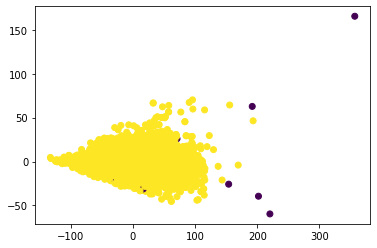

In [ ]:
import matplotlib.pyplot as plt

fig = plt.scatter(x=X_pca[:,0], y= X_pca[:,1], c = labels)
plt.show()

### 3.5 Outlier Analysis

Now we print the outliers in a table, in order to indentify them and also the reason why they are outliers.

In [ ]:
df_white_post['dbscan_group'] = labels
df_white_post[df_white_post['dbscan_group'] == -1]

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,residual sugar,sulphates,total sulfur dioxide,volatile acidity,dbscan_group
484,9.6,0.346,0.30,0.99540,6.2,79.0,3.29,6.60,0.58,200.0,0.370,-1
745,12.2,0.022,1.66,0.99165,7.4,34.0,3.26,2.10,0.55,113.0,0.200,-1
1417,11.0,0.057,0.35,1.00010,8.6,35.5,3.04,15.55,0.63,366.5,0.550,-1
1526,11.1,0.037,0.49,0.99200,14.2,33.0,3.15,1.10,0.54,156.0,0.270,-1
1931,11.0,0.047,0.22,0.99240,7.1,146.5,3.24,2.00,0.37,307.5,0.490,-1
1951,10.2,0.046,0.46,0.99660,9.9,34.0,3.02,1.40,0.49,185.0,1.005,-1
2127,9.5,0.062,0.38,0.99580,9.1,50.5,3.10,1.70,0.70,344.0,0.330,-1
2154,10.2,0.052,0.45,0.99940,9.8,34.0,3.12,8.60,0.59,187.0,0.930,-1
2781,11.7,0.074,0.60,1.03898,7.8,8.0,3.39,65.80,0.69,160.0,0.965,-1
3152,13.1,0.035,1.23,0.99018,7.6,51.0,3.03,4.60,0.43,294.0,0.250,-1


Once we have detected the ouliers we analize them in order to find the reason why those elements are outliers. We can do this procedure by comparing each element with the corresponding arithmetic mode.

![tabla.png](https://media.discordapp.net/attachments/487685117414735872/904312394564657182/descargar.png?width=861&height=263)

So, we decided to list the reasons why those elements are anomalous:

* Wine 484 have far higher values in the features:
  * chlorides
  * free sulfur dioxide
  * residual sugar 
* Wine 745 have far higher values in the features:
  * citric acid
* Wine 1417 have far higher values in the features:
  * total sulfur dioxide
  * residual sugar
* Wine 1526 have far higher values in the features:
  * fixed acidity
* Wine 1931 have far higher values in the features:
  * free sulfur dioxide
  * total sulfur dioxide
* Wine 1951 have far higher values in the features:
  * volatile acidity
* Wine 2127 have far higher values in the features:
  * free sulfur dioxide
  * total sulfur dioxide
* Wine 2154 have far higher values in the features:
  * residual sugar 
  * volatile acidity
* Wine 2781 have far higher values in the features:
  * residual sugar 
  * volatile acidity
* Wine 2781 have far lower values in the features:
  * free sulfur dioxide 
* Wine 3152 have far higher values in the features:
  * citric acid
* Wine 4039 have far higher values in the features:
  * volatile acidity
* Wine 4039 have far lower values in the features:
  * free sulfur dioxide
* Wine 4745 have far higher values in the features:
  * free sulfur dioxide
  * total sulfur dioxide


### 3.6 Recalculating PCA without outliers

Finally, we remove the outliers of the dataset in order to begin with the Clustering algorithms.

In [ ]:
no_outliers = []
for i, element in enumerate(df_white_post['dbscan_group']):
  if element == 0:
    no_outliers.append(i)

df_white_without_outliers = df_white_post.loc[no_outliers,:]

And we recalculate PCA without the outliers

In [ ]:
X_pca = PCA (n_components = n_components ).fit_transform(df_white_without_outliers)
X_pca

array([[ 3.40040634e+01,  1.54488014e+00,  1.27028484e+01,
        -1.84565882e-01, -9.00521883e-02, -9.62210372e-02],
       [-1.15686811e+01, -1.90441397e+01, -3.67868160e+00,
        -1.25086936e+00, -8.56426367e-01,  2.90252758e-02],
       [-4.09940939e+01,  5.54401941e+00,  2.48589388e+00,
        -9.59112306e-01,  1.18101869e+00,  1.72587421e-01],
       ...,
       [-2.77528210e+01,  1.81064833e+00, -3.73608606e+00,
        -1.75427347e+00, -5.02656669e-01, -2.25365229e-01],
       [-3.13331208e+01, -7.56336308e+00, -3.75112927e+00,
         1.79782437e+00, -1.06027348e+00, -2.84746290e-02],
       [-4.24038830e+01, -2.55600721e+00, -3.51928099e+00,
         5.65307974e-01, -6.79213081e-01, -6.64817375e-02]])

## 4.K-Means Clustering
<hr/>

Finally we have decided to use K-means clustering algorithm as it is the one that better fits with our problem (a huge number of components).

### 4.1 Parametrization

First of all we are going parametrize the data to establish the parameters that we are going to consider by default

In [ ]:
# parameters
init = 'random' # initialization method 

# to run 10 times with different random centroids 
# to choose the final model as the one with the lowest SSE
iterations = 10

# maximum number of iterations for each single run
max_iter = 300 

# controls the tolerance with regard to the changes in the 
# within-cluster sum-squared-error to declare convergence
tol = 1e-04 

 # random seed
random_state = 0

### 4.2 K Selection

We are going to **choose K** depending on the values that the clustering takes in terms of Distortion (SSE) and Silhouette from k = 2 to k = 11. 

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics

distortions = []
silhouettes = []

for i in range(2, 11):
    km = KMeans(i, init, n_init = iterations ,max_iter= max_iter, tol = tol,random_state = random_state)
    labels = km.fit_predict(X_pca)
    distortions.append(km.inertia_)
    silhouettes.append(metrics.silhouette_score(X_pca, labels))

In [ ]:
labels

array([4, 5, 1, ..., 0, 0, 1], dtype=int32)

We choose approximately the higher Silouehette with the lower Distortion.

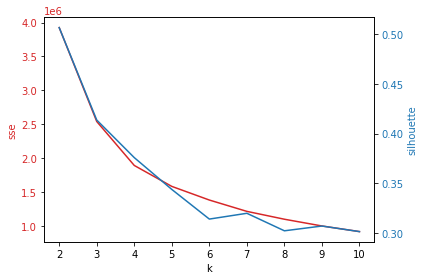

In [ ]:
import matplotlib.pyplot as plt

x = [i for i in range(2,11)]
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('k')
ax1.set_ylabel('sse', color=color)
ax1.plot(x, distortions, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('silhouette', color=color)
ax2.plot(x, silhouettes, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

Finally we choose the best possible K value 



In [ ]:
#@title Number of clusters {run: "auto"}
k = 4 #@param { type: "slider", min: 2, max: 10, step: 1}

### 4.3 K-means algorithm execution 

In [ ]:
print("Number of clusters:", k)
km = KMeans(k, init, n_init = iterations ,
            max_iter= max_iter, tol = tol, random_state = random_state)
y_km = km.fit_predict(X_pca)

Number of clusters: 4


Calculate the final values of the algorithm metrics

In [ ]:
from sklearn import metrics

print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X_pca, y_km)) 
print('Distortion: %.2f' % km.inertia_)

Silhouette Coefficient: 0.376
Distortion: 1890383.63


And finally we visualize the results.

In [ ]:
km.labels_

array([3, 1, 0, ..., 1, 1, 0], dtype=int32)

### 4.4 Draw the results

 We are using the PCA data to draw the results

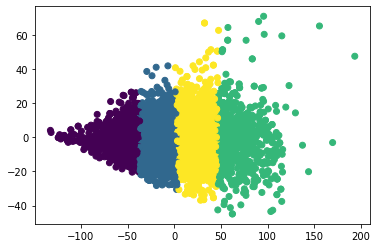

In [ ]:
import matplotlib.pyplot as plt

fig = plt.scatter(x=X_pca[:,0], y= X_pca[:,1], c = km.labels_)
plt.show()

## 5.Analysis or Interpretation of the results
<hr/>

### 5.1 Preprocessing of the results

We add the column ***kmeans_group*** to the dataframe to better distinguish between groups in the dataframe

In [ ]:
df_white_without_outliers['kmeans_group'] = km.labels_

We add the quality values again in order to take them into account for the analysis

In [ ]:
df_white_without_outliers['quality'] = df_white_pre.loc[no_outliers,'quality']

### 5.2 Analysis

We group the elements by clusters

In [ ]:
cluster0 = df_white_without_outliers[df_white_without_outliers['kmeans_group'] == 0]
cluster1 = df_white_without_outliers[df_white_without_outliers['kmeans_group'] == 1]
cluster2 = df_white_without_outliers[df_white_without_outliers['kmeans_group'] == 2]
cluster3 = df_white_without_outliers[df_white_without_outliers['kmeans_group'] == 3]

With every cluster we print a Bar Chart whith the means of the different features in order to see the proportion of the different features in every group. (As we will see later, all the features have the same proportion in every group and the real difference is in the total values of them)

In [ ]:
resX = df_white_without_outliers[['alcohol', 'chlorides', 'citric acid', 'density', 'fixed acidity', 'free sulfur dioxide', 'pH', 'residual sugar', 'sulphates', 'total sulfur dioxide', 'volatile acidity', 'quality', 'kmeans_group']].groupby(('kmeans_group')).mean()
res0 = cluster0[['alcohol', 'chlorides', 'citric acid', 'density', 'fixed acidity', 'free sulfur dioxide', 'pH', 'residual sugar', 'sulphates', 'total sulfur dioxide', 'volatile acidity', 'quality', 'kmeans_group']].groupby(('kmeans_group')).mean()
res1 = cluster1[['alcohol', 'chlorides', 'citric acid', 'density', 'fixed acidity', 'free sulfur dioxide', 'pH', 'residual sugar', 'sulphates', 'total sulfur dioxide', 'volatile acidity', 'quality', 'kmeans_group']].groupby(('kmeans_group')).mean()
res2 = cluster2[['alcohol', 'chlorides', 'citric acid', 'density', 'fixed acidity', 'free sulfur dioxide', 'pH', 'residual sugar', 'sulphates', 'total sulfur dioxide', 'volatile acidity', 'quality', 'kmeans_group']].groupby(('kmeans_group')).mean()
res3 = cluster3[['alcohol', 'chlorides', 'citric acid', 'density', 'fixed acidity', 'free sulfur dioxide', 'pH', 'residual sugar', 'sulphates', 'total sulfur dioxide', 'volatile acidity', 'quality', 'kmeans_group']].groupby(('kmeans_group')).mean()

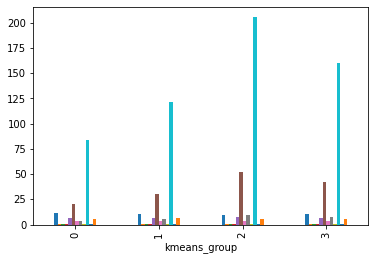

In [ ]:
resX.plot(kind='bar', legend=False)

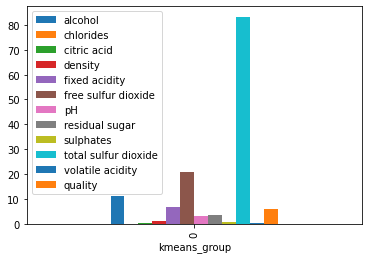

In [ ]:
res0.plot(kind='bar', legend=True)

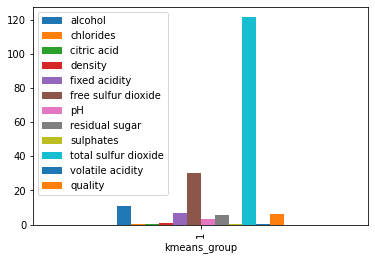

In [ ]:
res1.plot(kind='bar', legend=True)

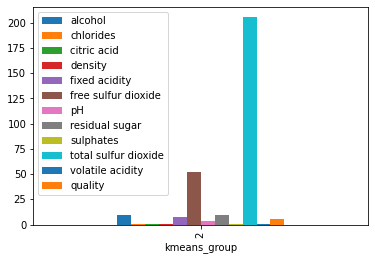

In [ ]:
res2.plot(kind='bar', legend=True)

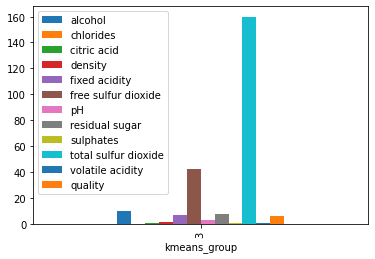

In [ ]:
res3.plot(kind='bar', legend=True)

Now we plot a Radar Chart with the different features ,classifying by the values of the features, in order to better see how they are related. This classification has been made due to the high difference in the values of the features. So we have decided to make 3 groups:

* **The first one** is for the features that have higher values. (Later we will see that these are the most relevant values)

* **The second one** is for the features that have neither higher or lower values.

* **The third one** if or the features that have lower values.

In [ ]:
res_high = ['total sulfur dioxide', 'free sulfur dioxide', 'kmeans_group']
res_medium = ['fixed acidity','residual sugar', 'quality', 'alcohol', 'kmeans_group']
res_low = ['chlorides', 'citric acid', 'density', 'pH', 'sulphates', 'volatile acidity', 'kmeans_group']

res_high_plot = df_white_without_outliers[res_high].groupby(('kmeans_group')).mean()
res_medium_plot = df_white_without_outliers[res_medium].groupby(('kmeans_group')).mean()
res_low_plot = df_white_without_outliers[res_low].groupby(('kmeans_group')).mean()

In [ ]:
import plotly.graph_objects as go
def print_radar (ress):
  categories = ress.columns.values
  fig = go.Figure()
  for row in ress.iterrows():
    fig.add_trace(go.Scatterpolar(
      r=row[1].values,
      theta=categories,
      fill='toself',
      name= "group" + str(row[0])
    ))

  fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
    )),
  showlegend=True
  )

  fig.show()

In [ ]:
print_radar(res_high_plot)

In [ ]:
print_radar(res_medium_plot)

In [ ]:
print_radar(res_low_plot)

### 5.3 Conclusions

Paying attention to the previously plotted graphics, 
we can say that the ***free sulfur dioxide*** and the ***total sulfur dioxide***
in conjunction with the ***free sugar*** and the ***alcohol*** are the properties
that makes the difference between clusters as the rest of the properties are so
similiar in all the groups.

Furthermore we want to add that the porpotion of the different features is mostly
the same in all the groups and what really differentiates one cluster from another
is the absolute value of the previously mentioned features.

We also want to comment that the following information has also been discovered:
* The higher the ***free sugar***, the lower the ***alcohol*** in a wine, in other words,
sweet wines will have less alcohol.

* The cluster 1, is the one which has the "better" wines as its wines are the ones that
have a better ***quality*** feature.


### 5.4 And that's all about wines


<div align="center">

![](https://media3.giphy.com/media/8Iv5lqKwKsZ2g/giphy.gif?cid=790b76112dec37b921dbd60e537a8e36a6fd39372cbf7e50&rid=giphy.gif&ct=g)

</div>